In [ ]:
!pip install tensorflow
!pip install -q keras

# Task 1

In [52]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import *             
from sklearn.model_selection import train_test_split 

def image_to_vector(image):
  
  image_vector = image.reshape(image.shape[0]*image.shape[1],1)
  return image_vector


def plot_train_val(history, nodes):
    acc_title = 'model accuracy for '+str(nodes)+' Nodes'
    loss_title = 'model loss for '+str(nodes)+' Nodes'
  
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(acc_title)
    plt.ylabel('Accuracy')
    plt.xlabel('No of Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(loss_title)
    plt.ylabel('Loss')
    plt.xlabel('No of Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

zipPath = './optdigits-orig.windep.Z'
filePath = './optdigits-orig.windep'
inputfilesPath = './input_data.csv'
targetfilesPath = './target_data.csv'

dg_file=open(filePath,'r')
dg_file.seek(22)

data = []
image = []
images = []
image_vec = []
labels = []
count = 1

for line in dg_file.readlines():
    if(len(line)==33):
        arr = []
        line = line.rstrip('\n')
        for c in line:
            arr.append(int(c))
        image.append(arr)
       
    elif(len(line)==3):
        
        digit=str(line)
        digit=digit.strip()
        labels.append(int(digit))
        data = np.array(image)
        temp = image_to_vector(data)
        image_vec.append(temp)
        image = []
        data = []
        count = 1

    count+=1

image_vec = np.array(image_vec)
labels = np.array(labels).T

print('No of Input Samples : ',len(image_vec)) 
print('No of Target Samples : ',len(labels))

print('Shape of Inputs : ',image_vec.shape)
print('Shape of Targets : ',labels.shape)

No of Input Samples :  1797
No of Target Samples :  1797
Shape of Inputs :  (1797, 1024, 1)
Shape of Targets :  (1797,)


### Validating the read Data

Shape of sample " 1795 " :  (1024, 1)
Length of sample " 1795 " :  1024
Label of sample " 1795 " :  9
Below is the image of label


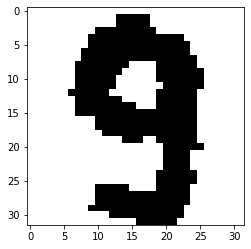

In [53]:
#-- Displaying the image from encoded data
index = 1795
print('Shape of sample "',index,'" : ',image_vec[index].shape)
print('Length of sample "',index,'" : ',len(image_vec[index]))
print('Label of sample "',index,'" : ',labels[index])
print('Below is the image of label')
matrix =image_vec[index].reshape(32,32)
plt.imshow(matrix, cmap=plt.cm.binary)
plt.show()

# Task 2

In [54]:
x_train,x_val,y_train, y_val = train_test_split(inputsdf,labelsdf,test_size=0.2) #--- dividing Data into 80 % Train and 20% validation
x_val,x_test,y_val, y_test = train_test_split(x_val,y_val,test_size=0.5) #--- further dividing validation into 10 % validation and 10% test
print('Shape of X_Train : ',x_train.shape)
print('Shape of Y_Train : ',y_train.shape)
print('Shape of X_Val : ',x_val.shape)
print('Shape of y_Val : ',y_val.shape)
print('Shape of X_Test : ',x_test.shape)
print('Shape of y_Test : ',y_test.shape)

train_x = np.array(x_train)
train_y = np.array(y_train)
val_x = np.array(x_val)
val_y = np.array(y_val)
test_x = np.array(x_test)
test_y = np.array(y_test)

train_x = tf.keras.utils.normalize(train_x, axis=1)
val_x = tf.keras.utils.normalize(val_x, axis=1)
test_x = tf.keras.utils.normalize(test_x, axis=1)
train_y = tf.keras.utils.normalize(train_y, axis=1)
val_y = tf.keras.utils.normalize(val_y, axis=1)
test_y = tf.keras.utils.normalize(test_y, axis=1)

Shape of X_Train :  (1437, 1024)
Shape of Y_Train :  (1437, 1)
Shape of X_Val :  (180, 1024)
Shape of y_Val :  (180, 1)
Shape of X_Test :  (180, 1024)
Shape of y_Test :  (180, 1)


#Building the Model

In [55]:
def getModel(no_of_hidden_layers):
  
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten()) 
    model.add(tf.keras.layers.Dense(no_of_hidden_layers,activation= tf.nn.relu)) 
    model.add(tf.keras.layers.Dense(10,activation= tf.nn.softmax))
    return model

# 10 Hidden Nodes

Epoch 1/3
45/45 [==============================] - 1s 13ms/step - loss: 1.6615 - accuracy: 0.8476 - val_loss: 1.0858 - val_accuracy: 0.8611
Epoch 2/3
45/45 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.9054 - val_loss: 0.5717 - val_accuracy: 0.8611
Epoch 3/3
6/6 [==============================] - 0s 3ms/step - loss: 0.3345 - accuracy: 0.9056
--> Testing Loss :  0.33447152376174927 . Testing Accuracy :  0.9055555462837219
INFO:tensorflow:Assets written to: ./tc01-10-03.model/assets
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


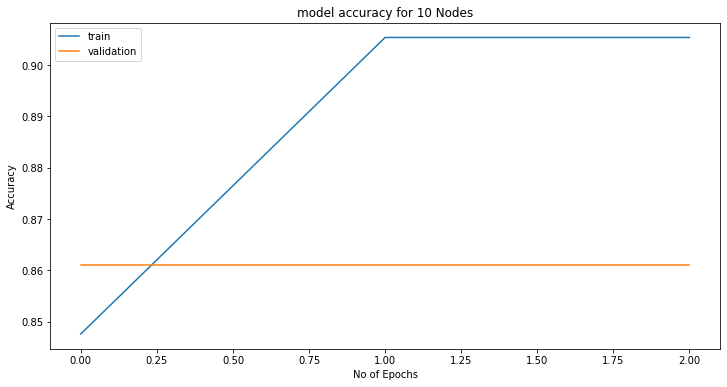

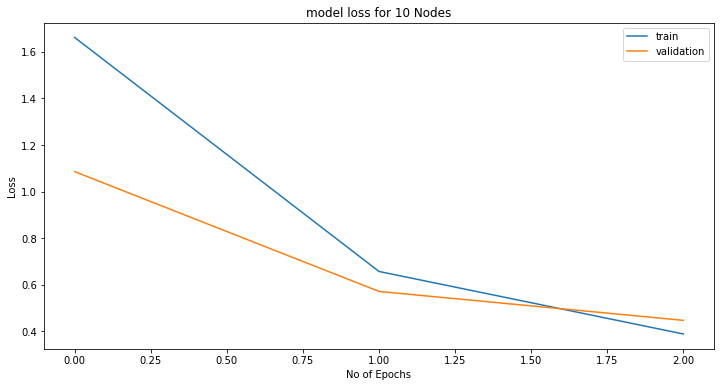

In [57]:
model1 = getModel(10)

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

history1 = model1.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=3)

test_loss, test_acc = model1.evaluate(test_x,test_y)
print('--> Testing Loss : ',test_loss,'. Testing Accuracy : ',test_acc)

model1_path = './tc01-10-03.model'
model1.save(model1_path)

print(history1.history.keys())
plot_train_val(history1, 10)

# 100 Hidden Nodes

Epoch 1/3
45/45 [==============================] - 1s 7ms/step - loss: 0.9994 - accuracy: 0.8671 - val_loss: 0.4247 - val_accuracy: 0.8611
Epoch 2/3
45/45 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.9054 - val_loss: 0.2461 - val_accuracy: 0.8611
Epoch 3/3
6/6 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9778
--> Testing Loss :  0.10407201945781708 . Testing Accuracy :  0.9777777791023254
INFO:tensorflow:Assets written to: ./tc02-100-03.model/assets
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


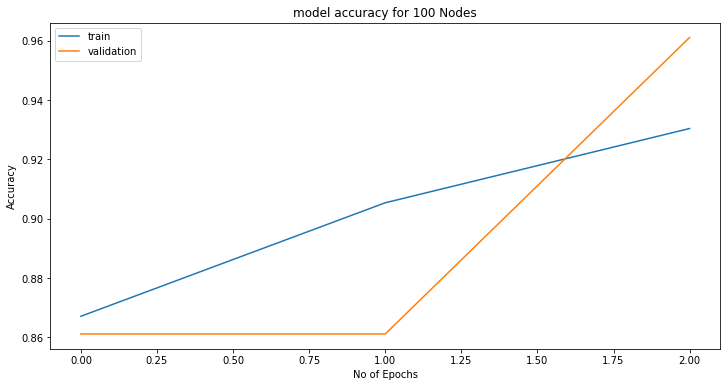

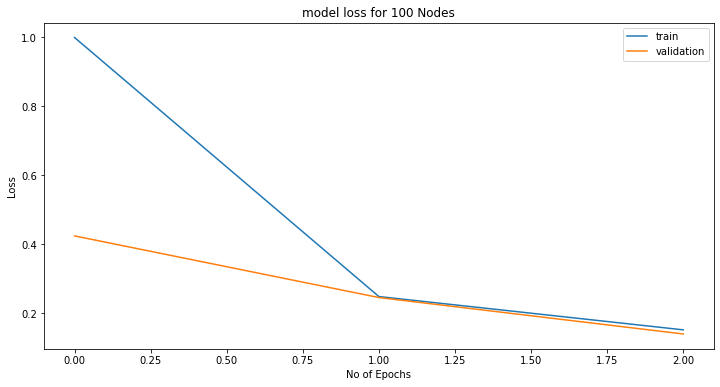

In [58]:
model2 = getModel(100)
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history2 = model2.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=3)

test_loss, test_acc = model2.evaluate(test_x,test_y)
print('--> Testing Loss : ',test_loss,'. Testing Accuracy : ',test_acc)

model2_path = './tc02-100-03.model'
model2.save(model2_path)

print(history2.history.keys())
plot_train_val(history2, 100)


# 500 Hidden Nodes

Epoch 1/3
45/45 [==============================] - 1s 10ms/step - loss: 0.5450 - accuracy: 0.8859 - val_loss: 0.1856 - val_accuracy: 0.8833
Epoch 2/3
45/45 [==============================] - 0s 7ms/step - loss: 0.0852 - accuracy: 0.9770 - val_loss: 0.0614 - val_accuracy: 0.9889
Epoch 3/3
6/6 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 1.0000
--> Testing Loss :  0.017582369968295097 . Testing Accuracy :  1.0
INFO:tensorflow:Assets written to: ./tc03-500-03.model/assets
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


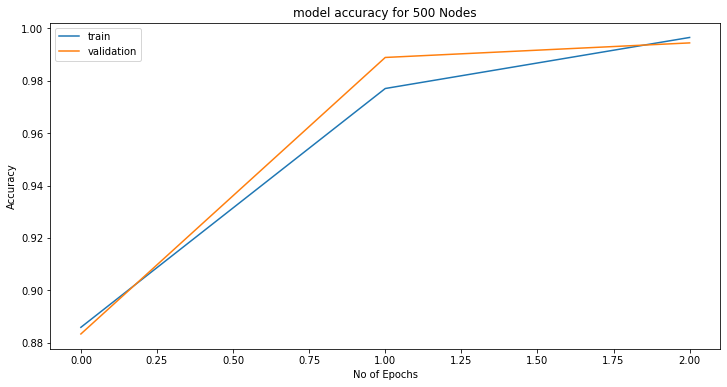

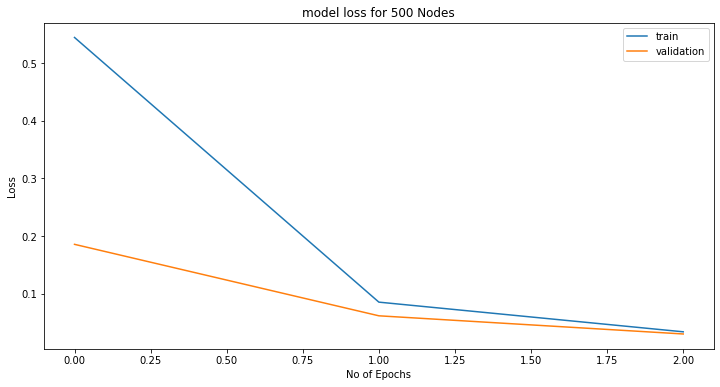

In [59]:
model3 = getModel(500)

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history3 = model3.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=3)

test_loss, test_acc = model3.evaluate(test_x,test_y)
print('--> Testing Loss : ',test_loss,'. Testing Accuracy : ',test_acc)

model3_path = './tc03-500-03.model'
model3.save(model3_path)

print(history3.history.keys())
plot_train_val(history3, 500)